### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Read the Dataset:

In [2]:
train = pd.read_csv("sample_train.csv")
train.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2018-02-28,2018-03-30,True
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,2018-03-28,2018-04-28,False
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2018-02-13,2018-02-23,False


### Rename the columns:

In [3]:
train.rename(columns={'First Payment Default': 'First_Payment_Default','Loan Due Date': 'Loan_Due_Date',
                  'Loan Funded Date': 'Loan_Funded_Date','Pay Cycle': 'Pay_Cycle','Rent or Own': 'Rent_or_Own',
                  'Bank Account Months': 'Bank_Account_Months','Loan Amount': 'Loan_Amount',
                  'Monthly Net Income': 'Monthly_Net_Income','Months at Residence': 'Months_at_Residence',
                  'Paycheck Net Income': 'Paycheck_Net_Income'}, inplace=True)

In [4]:
train.shape

(1600, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
SetID                    1600 non-null int64
Time of Application      1600 non-null object
State                    1600 non-null object
Monthly_Net_Income       1600 non-null float64
Paycheck_Net_Income      1600 non-null float64
Rent_or_Own              1600 non-null object
Months_at_Residence      1600 non-null int64
Bank_Account_Months      1600 non-null int64
Pay_Cycle                1600 non-null object
Loan_Amount              1600 non-null float64
Loan_Funded_Date         1600 non-null object
Loan_Due_Date            1600 non-null object
First_Payment_Default    1600 non-null bool
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 151.6+ KB


### Convert Object type to Datetime and extract Month, Day and Hour:

In [6]:
train["Time_of_application"] = pd.to_datetime(train['Time of Application'])# removes alphabet (A->a)

In [7]:
train.head(2)

,SetID,Time of Application,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False,2018-03-28 17:27:35
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False,2018-03-23 13:19:32


In [8]:
## Drop the original 'Time of Application' column
train = train.drop(['Time of Application'], axis =1)

In [9]:
train.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False,2018-03-28 17:27:35
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False,2018-03-23 13:19:32


In [10]:
train['Month_only']= train['Time_of_application'].dt.month
train['Day_only']= train['Time_of_application'].dt.day
train['Hour_only']= train['Time_of_application'].dt.hour

In [11]:
train.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application,Month_only,Day_only,Hour_only
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False,2018-03-28 17:27:35,3,28,17
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False,2018-03-23 13:19:32,3,23,13


### Flag Variable:

In [12]:
train['time_part_only']= pd.to_datetime(train['Time_of_application'], format = '%H:%M:%S').dt.time.astype(str)
train['application_time_flag']= train['time_part_only'].apply(lambda x: 1 if x >= '08:00:00' and x <= '18:00:00' else (0))
train.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application,Month_only,Day_only,Hour_only,time_part_only,application_time_flag
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False,2018-03-28 17:27:35,3,28,17,17:27:35,1
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False,2018-03-23 13:19:32,3,23,13,13:19:32,1


In [13]:
# drop time_part_only column
train = train.drop(['time_part_only'], axis =1)
train.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application,Month_only,Day_only,Hour_only,application_time_flag
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False,2018-03-28 17:27:35,3,28,17,1
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False,2018-03-23 13:19:32,3,23,13,1


In [14]:
train['application_time_flag'].value_counts()

1    1249
0     351
Name: application_time_flag, dtype: int64

### Data Pre Processing:

#### Check for Duplicates ID:

In [15]:
counts = train['SetID'].value_counts()
train[train['SetID'].isin(counts.index[counts > 1])]

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application,Month_only,Day_only,Hour_only,application_time_flag


This shows that we dont have any duplicates ID in the dataset, therefore ID is the unique key on the givendataset.

## Missing value assesment :

### Observe data types with missing values

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 17 columns):
SetID                    1600 non-null int64
State                    1600 non-null object
Monthly_Net_Income       1600 non-null float64
Paycheck_Net_Income      1600 non-null float64
Rent_or_Own              1600 non-null object
Months_at_Residence      1600 non-null int64
Bank_Account_Months      1600 non-null int64
Pay_Cycle                1600 non-null object
Loan_Amount              1600 non-null float64
Loan_Funded_Date         1600 non-null object
Loan_Due_Date            1600 non-null object
First_Payment_Default    1600 non-null bool
Time_of_application      1600 non-null datetime64[ns]
Month_only               1600 non-null int64
Day_only                 1600 non-null int64
Hour_only                1600 non-null int64
application_time_flag    1600 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(7), object(5)
memory usage: 201.6+ KB


In [17]:
train.dtypes

SetID                             int64
State                            object
Monthly_Net_Income              float64
Paycheck_Net_Income             float64
Rent_or_Own                      object
Months_at_Residence               int64
Bank_Account_Months               int64
Pay_Cycle                        object
Loan_Amount                     float64
Loan_Funded_Date                 object
Loan_Due_Date                    object
First_Payment_Default              bool
Time_of_application      datetime64[ns]
Month_only                        int64
Day_only                          int64
Hour_only                         int64
application_time_flag             int64
dtype: object

In [18]:
train.isnull().sum()

SetID                    0
State                    0
Monthly_Net_Income       0
Paycheck_Net_Income      0
Rent_or_Own              0
Months_at_Residence      0
Bank_Account_Months      0
Pay_Cycle                0
Loan_Amount              0
Loan_Funded_Date         0
Loan_Due_Date            0
First_Payment_Default    0
Time_of_application      0
Month_only               0
Day_only                 0
Hour_only                0
application_time_flag    0
dtype: int64

In [19]:
train.isnull().any()

SetID                    False
State                    False
Monthly_Net_Income       False
Paycheck_Net_Income      False
Rent_or_Own              False
Months_at_Residence      False
Bank_Account_Months      False
Pay_Cycle                False
Loan_Amount              False
Loan_Funded_Date         False
Loan_Due_Date            False
First_Payment_Default    False
Time_of_application      False
Month_only               False
Day_only                 False
Hour_only                False
application_time_flag    False
dtype: bool

This clearly shows that there is no any missing values in the given dataset.

In [20]:
train['Day_only'].value_counts() # Frequency of application for different days

5     124
12     85
9      83
26     76
8      73
2      73
14     71
1      69
27     68
13     66
15     62
20     61
6      60
3      59
22     57
28     53
4      51
7      50
19     47
23     44
21     42
31     37
29     31
25     27
16     25
24     22
10     21
30     21
17     18
18     14
11     10
Name: Day_only, dtype: int64

In [21]:
train.describe()

,SetID,Monthly_Net_Income,Paycheck_Net_Income,Months_at_Residence,Bank_Account_Months,Loan_Amount,Month_only,Day_only,Hour_only,application_time_flag
count,1600.0000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1004.8700,4362.641250,2718.488750,63.285625,24.731250,317.974619,2.773750,14.233125,13.766250,0.780625
std,584.0755,5524.868265,4894.909919,70.777592,23.414134,176.993218,0.754431,9.041564,4.068256,0.413953
min,2.0000,70.000000,70.000000,0.000000,3.000000,117.650000,1.000000,1.000000,0.000000,0.000000
25%,492.7500,2000.000000,1250.000000,17.000000,6.000000,235.300000,2.000000,6.000000,11.000000,1.000000
50%,1012.5000,3200.000000,2100.000000,39.000000,24.000000,300.000000,3.000000,13.000000,14.000000,1.000000
75%,1514.2500,5139.000000,3500.000000,81.000000,36.000000,320.592500,3.000000,22.000000,17.000000,1.000000
max,2000.0000,184000.000000,184000.000000,690.000000,410.000000,644.240000,4.000000,31.000000,23.000000,1.000000


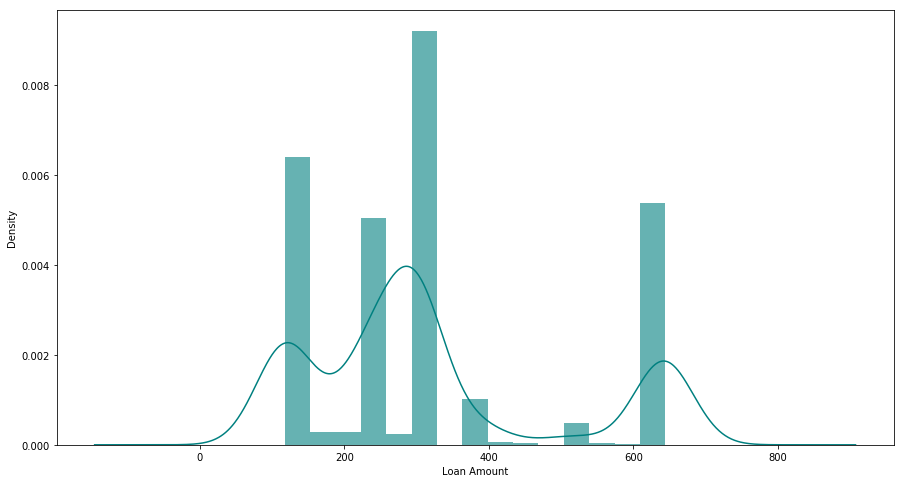

In [22]:
plt.figure(figsize=(15,8))
ax = train["Loan_Amount"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Loan_Amount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### Dependent Variable Distribution:

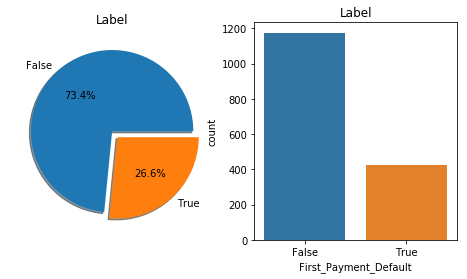

In [23]:
f,ax = plt.subplots(1,2, figsize= (8,4))
train['First_Payment_Default'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax= ax[0], shadow= True)
ax[0].set_title("Label")
ax[0].set_ylabel('')
sns.countplot('First_Payment_Default', data = train, ax= ax[1])
ax[1].set_title('Label')
plt.show()

we observed that distribution of classes (False/True) is skewed so we need to do stratified sampling approach while training the model.

### Correlation between Continuous Variables:

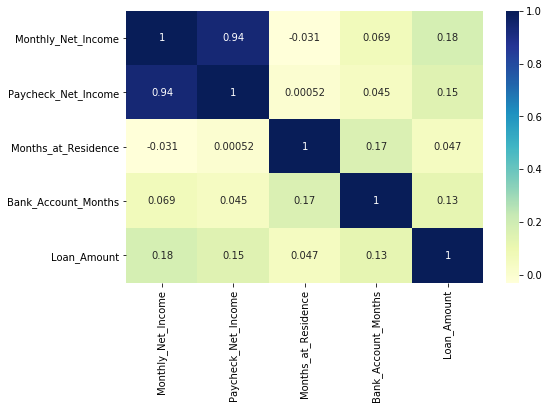

In [24]:
continuous_features = ['Monthly_Net_Income', 'Paycheck_Net_Income', 'Months_at_Residence', 'Bank_Account_Months', 'Loan_Amount']
cont = train[continuous_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(cont.corr(), annot=True, cmap="YlGnBu") ##cmap="RdYlGn" for red, yellow, and green
plt.show()

In [25]:
cont.corr()

,Monthly_Net_Income,Paycheck_Net_Income,Months_at_Residence,Bank_Account_Months,Loan_Amount
Monthly_Net_Income,1.000000,0.936308,-0.030648,0.069021,0.179618
Paycheck_Net_Income,0.936308,1.000000,0.000516,0.045390,0.148856
Months_at_Residence,-0.030648,0.000516,1.000000,0.166267,0.046890
Bank_Account_Months,0.069021,0.045390,0.166267,1.000000,0.125348
Loan_Amount,0.179618,0.148856,0.046890,0.125348,1.000000


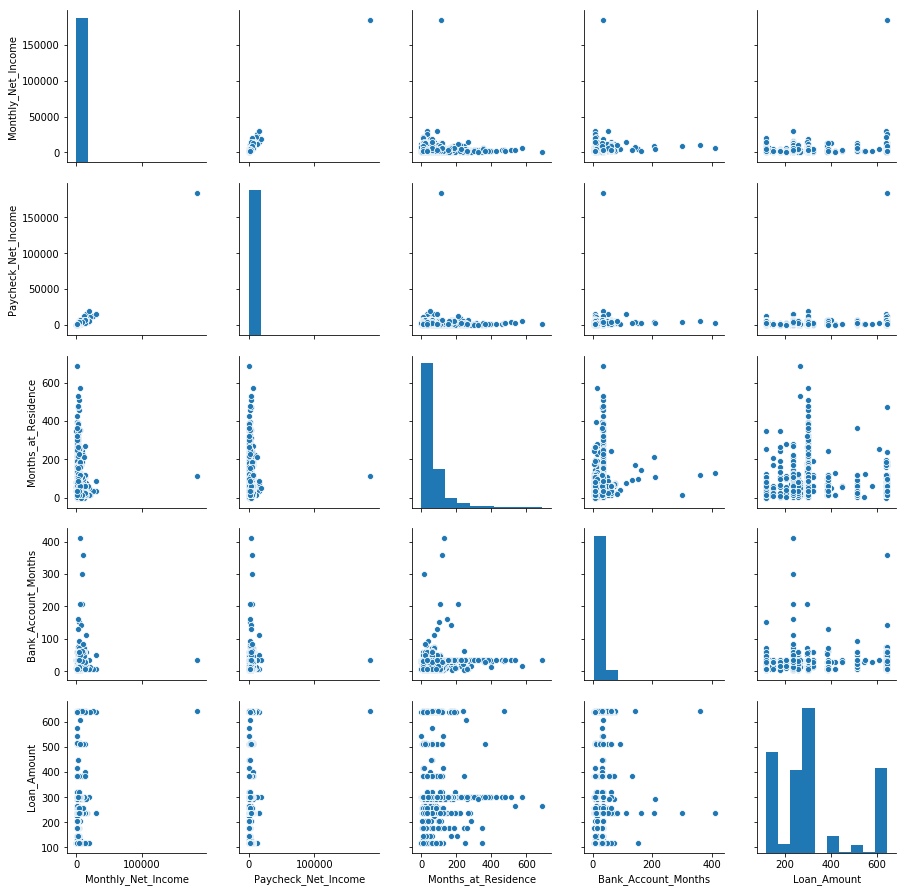

In [26]:
sns.pairplot(cont)

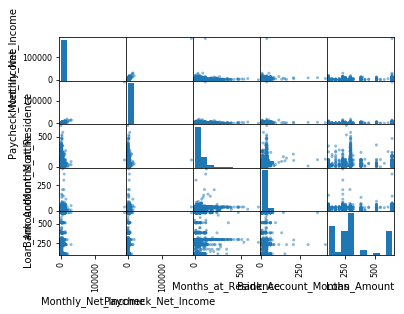

In [27]:
# Multivariate Plots
# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(cont)
plt.show()

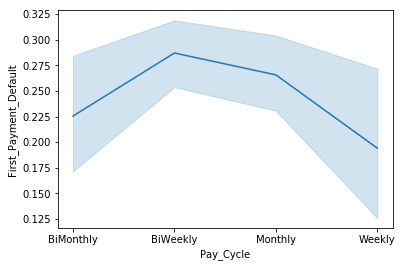

In [30]:
axes = sns.lineplot(data=train, x='Pay_Cycle', y='First_Payment_Default')

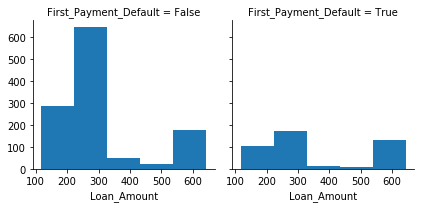

In [31]:
g = sns.FacetGrid(train, col='First_Payment_Default')
g.map(plt.hist, 'Loan_Amount', bins=5)

### More people with Loan Amaount 125-325 are not paying First_Payment_Default

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

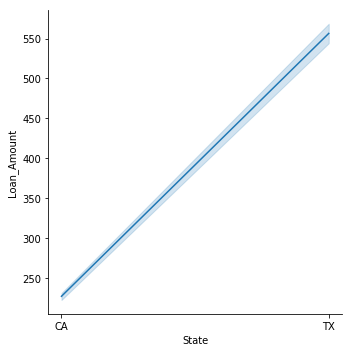

In [32]:
g = sns.relplot(x="State", y="Loan_Amount", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

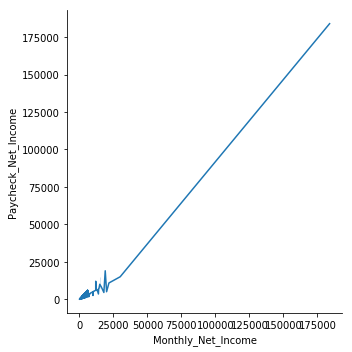

In [33]:
g = sns.relplot(x="Monthly_Net_Income", y="Paycheck_Net_Income", kind="line", data=train)
g.fig.autofmt_xdate

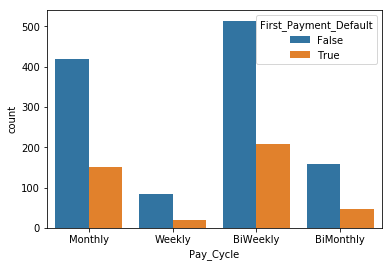

In [34]:
sns.countplot(data=train,x='Pay_Cycle',hue='First_Payment_Default')

## Outlier Detection: 
### For this type of data we simply ignore outliers.

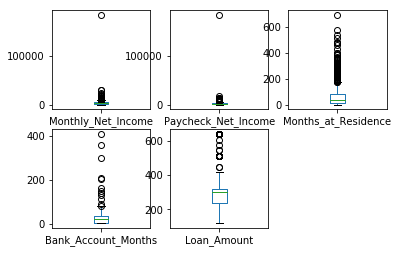

In [35]:
## box and whisker plots
cont.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

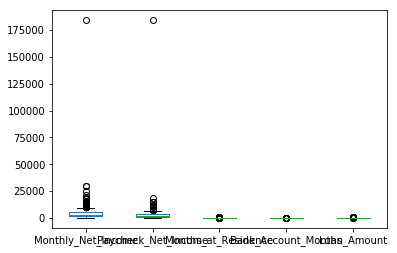

In [36]:
cont.plot.box() 

### Create the list of Columns Family:

In [37]:
train.dtypes

SetID                             int64
State                            object
Monthly_Net_Income              float64
Paycheck_Net_Income             float64
Rent_or_Own                      object
Months_at_Residence               int64
Bank_Account_Months               int64
Pay_Cycle                        object
Loan_Amount                     float64
Loan_Funded_Date                 object
Loan_Due_Date                    object
First_Payment_Default              bool
Time_of_application      datetime64[ns]
Month_only                        int64
Day_only                          int64
Hour_only                         int64
application_time_flag             int64
dtype: object

In [38]:
train1=train.drop(columns=['SetID','Time_of_application','First_Payment_Default','Loan_Due_Date','Loan_Funded_Date'])
train1.head(2)

,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Month_only,Day_only,Hour_only,application_time_flag
0,CA,2000.0,2000.0,R,12,6,Monthly,300.00,3,28,17,1
1,TX,3500.0,3500.0,R,60,60,Monthly,641.91,3,23,13,1


In [39]:
ID_col = ['SetID']
target_col = ['First_Payment_Default']
cat_cols = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag']
date_cols = ['Loan_Funded_Date','Loan_Due_Date','Time_of_application']
num_cols = list(set(list(train.columns))- set(cat_cols)-set(ID_col)-set(target_col)-set(date_cols))

In [40]:
num_cols

['Month_only',
 'Hour_only',
 'Months_at_Residence',
 'Paycheck_Net_Income',
 'Monthly_Net_Income',
 'Bank_Account_Months',
 'Loan_Amount',
 'Day_only']

In [41]:
### combined numerical and categorical cols
num_cat_cols = num_cols + cat_cols

In [42]:
num_cat_cols

['Month_only',
 'Hour_only',
 'Months_at_Residence',
 'Paycheck_Net_Income',
 'Monthly_Net_Income',
 'Bank_Account_Months',
 'Loan_Amount',
 'Day_only',
 'State',
 'Rent_or_Own',
 'Pay_Cycle',
 'application_time_flag']

### Rescaling:

In [43]:
cols_normalize = train.columns.difference(['SetID','Loan_Funded_Date','Loan_Due_Date','Time_of_application','State', 
                                           'Rent_or_Own','Pay_Cycle','First_Payment_Default'])
cols_normalize   ### mean/sd so unitless

Index(['Bank_Account_Months', 'Day_only', 'Hour_only', 'Loan_Amount',
       'Month_only', 'Monthly_Net_Income', 'Months_at_Residence',
       'Paycheck_Net_Income', 'application_time_flag'],
      dtype='object')

In [45]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train[cols_normalize]), columns= cols_normalize, index= train.index)
train_df = pd.concat([train[train.columns.difference(cols_normalize)], norm_train_df], axis =1)

C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
train_df.head()

,First_Payment_Default,Loan_Due_Date,Loan_Funded_Date,Pay_Cycle,Rent_or_Own,SetID,State,Time_of_application,Bank_Account_Months,Day_only,Hour_only,Loan_Amount,Month_only,Monthly_Net_Income,Months_at_Residence,Paycheck_Net_Income,application_time_flag
0,False,2018-04-11,2018-03-28,Monthly,R,436,CA,2018-03-28 17:27:35,0.007371,0.900000,0.739130,0.346285,0.666667,0.010493,0.017391,0.010493,1.0
1,False,2018-04-06,2018-03-23,Monthly,R,615,TX,2018-03-23 13:19:32,0.140049,0.733333,0.565217,0.995575,0.666667,0.018648,0.086957,0.018648,1.0
2,True,2018-03-30,2018-02-28,Monthly,R,1251,CA,2018-02-28 12:04:56,0.007371,0.900000,0.521739,0.000000,0.333333,0.015930,0.000000,0.015930,1.0
3,False,2018-04-28,2018-03-28,Monthly,R,440,CA,2018-03-28 15:47:59,0.007371,0.900000,0.652174,0.000000,0.666667,0.007775,0.017391,0.007775,1.0
4,False,2018-02-23,2018-02-13,Weekly,R,1692,CA,2018-02-13 04:36:00,0.081081,0.400000,0.173913,0.346285,0.333333,0.012624,0.188406,0.002871,0.0


### Label Encoding and One Hot Encoding:

In [47]:
train_df = pd.get_dummies(train_df, columns = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag'], 
                          prefix = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag'])

In [48]:
train_df.head()

,First_Payment_Default,Loan_Due_Date,Loan_Funded_Date,SetID,Time_of_application,Bank_Account_Months,Day_only,Hour_only,Loan_Amount,Month_only,Monthly_Net_Income,Months_at_Residence,Paycheck_Net_Income,State_CA,State_TX,Rent_or_Own_O,Rent_or_Own_R,Pay_Cycle_BiMonthly,Pay_Cycle_BiWeekly,Pay_Cycle_Monthly,Pay_Cycle_Weekly,application_time_flag_0.0,application_time_flag_1.0
0,False,2018-04-11,2018-03-28,436,2018-03-28 17:27:35,0.007371,0.900000,0.739130,0.346285,0.666667,0.010493,0.017391,0.010493,1,0,0,1,0,0,1,0,0,1
1,False,2018-04-06,2018-03-23,615,2018-03-23 13:19:32,0.140049,0.733333,0.565217,0.995575,0.666667,0.018648,0.086957,0.018648,0,1,0,1,0,0,1,0,0,1
2,True,2018-03-30,2018-02-28,1251,2018-02-28 12:04:56,0.007371,0.900000,0.521739,0.000000,0.333333,0.015930,0.000000,0.015930,1,0,0,1,0,0,1,0,0,1
3,False,2018-04-28,2018-03-28,440,2018-03-28 15:47:59,0.007371,0.900000,0.652174,0.000000,0.666667,0.007775,0.017391,0.007775,1,0,0,1,0,0,1,0,0,1
4,False,2018-02-23,2018-02-13,1692,2018-02-13 04:36:00,0.081081,0.400000,0.173913,0.346285,0.333333,0.012624,0.188406,0.002871,1,0,0,1,0,0,0,1,1,0


### Encode Target Variable:

In [49]:
from sklearn.preprocessing import LabelEncoder
for var in target_col:
    number = LabelEncoder()
    train_df[var] = number.fit_transform(train_df[var].astype('category'))

In [50]:
train_df.head()

,First_Payment_Default,Loan_Due_Date,Loan_Funded_Date,SetID,Time_of_application,Bank_Account_Months,Day_only,Hour_only,Loan_Amount,Month_only,Monthly_Net_Income,Months_at_Residence,Paycheck_Net_Income,State_CA,State_TX,Rent_or_Own_O,Rent_or_Own_R,Pay_Cycle_BiMonthly,Pay_Cycle_BiWeekly,Pay_Cycle_Monthly,Pay_Cycle_Weekly,application_time_flag_0.0,application_time_flag_1.0
0,0,2018-04-11,2018-03-28,436,2018-03-28 17:27:35,0.007371,0.900000,0.739130,0.346285,0.666667,0.010493,0.017391,0.010493,1,0,0,1,0,0,1,0,0,1
1,0,2018-04-06,2018-03-23,615,2018-03-23 13:19:32,0.140049,0.733333,0.565217,0.995575,0.666667,0.018648,0.086957,0.018648,0,1,0,1,0,0,1,0,0,1
2,1,2018-03-30,2018-02-28,1251,2018-02-28 12:04:56,0.007371,0.900000,0.521739,0.000000,0.333333,0.015930,0.000000,0.015930,1,0,0,1,0,0,1,0,0,1
3,0,2018-04-28,2018-03-28,440,2018-03-28 15:47:59,0.007371,0.900000,0.652174,0.000000,0.666667,0.007775,0.017391,0.007775,1,0,0,1,0,0,1,0,0,1
4,0,2018-02-23,2018-02-13,1692,2018-02-13 04:36:00,0.081081,0.400000,0.173913,0.346285,0.333333,0.012624,0.188406,0.002871,1,0,0,1,0,0,0,1,1,0


### Train and Test Split (Stratified Sampling: independent groupings)

### Drop unnecessary columns for train dataset

In [51]:
### Create a dataframe with all training data except the target column 
train_X = train_df.drop(['Loan_Due_Date','Loan_Funded_Date','SetID','Time_of_application','First_Payment_Default'], axis =1)

In [52]:
### Create a dataframe with only the target column
train_y = train_df['First_Payment_Default'].values
train_y

array([0, 0, 1, ..., 1, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y,test_size=0.3, random_state=12)

In [54]:
print (X_train.shape)
print (X_test.shape)

(1120, 18)
(480, 18)


## 1.  Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, f1_score, auc
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train,y_train)
# predict probabilities 
probs = logisticRegr.predict_proba(X_test)
## Keep Probabilities for the positive outcome only 
probs = probs[:,1]
## Test Data Accuracy 
yhat = logisticRegr.predict(X_test)
accuracy_score(y_test, yhat)
## Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
## Calculate F1 Score 
f1= f1_score(y_test, yhat)
## Calculate precison recall auc
auc = auc (recall, precision)
## Calculate average precision score 
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc = %.3f, ap = %.3f' % (f1, auc, ap))

f1=0.000 auc = 0.311, ap = 0.316


C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


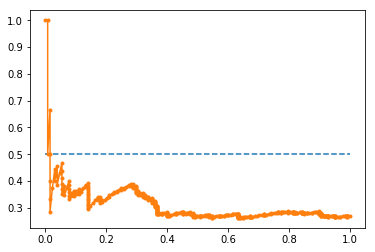

In [56]:
from matplotlib import pyplot
pyplot.plot([0,1], [0.5,0.5], linestyle= '--')
pyplot.plot(recall, precision, marker = '.')
pyplot.show()

AUC: 0.538


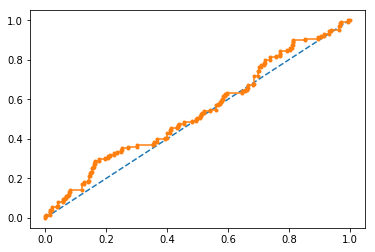

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)
print ('AUC: %.3f' % auc)

#calculate roc curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

### Plot in Training data:

AUC: 0.608


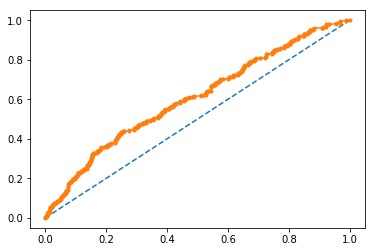

In [58]:
# predict probabilities 
probs1 = logisticRegr.predict_proba(X_train)
## Keep Probabilities for the positive outcome only 
probs1 = probs1[:,1]
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_train, probs1)
print ('AUC: %.3f' % auc)
#calculate roc curve 
fpr, tpr, thresholds = roc_curve(y_train, probs1)
pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

In [59]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat)
cnf_matrix

array([[352,   0],
       [128,   0]], dtype=int64)

## 2. Decision Tree

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, f1_score, auc
#Fit the model 
logisticRegr = ExtraTreesClassifier()
logisticRegr = logisticRegr.fit(X_train,y_train)

# predict probabilities 
probs = logisticRegr.predict_proba(X_test)

## Keep Probabilities for the positive outcome only 
probs = probs[:,1]

## Test Data Accuracy 
yhat = logisticRegr.predict(X_test)
accuracy_score(y_test, yhat)

## Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

## Calculate F1 Score 
f1= f1_score(y_test, yhat)

## Calculate precison recall auc
auc = auc (recall, precision)

## Calculate average precision score 
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc = %.3f, ap = %.3f' % (f1, auc, ap))

f1=0.275 auc = 0.382, ap = 0.360


C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


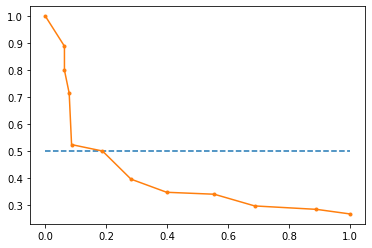

In [374]:
from matplotlib import pyplot

pyplot.plot([0,1], [0.5,0.5], linestyle= '--')
pyplot.plot(recall, precision, marker = '.')
pyplot.show()

AUC: 0.566


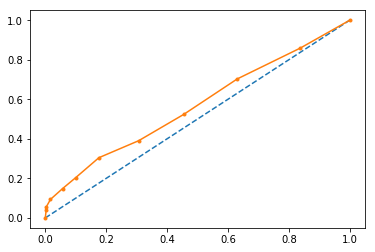

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)
print ('AUC: %.3f' % auc)
#calculate roc curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

## 3. Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)
print('Accuracy of RF on training data: {}'.format(rf.score(X_train, y_train)))
rf=rf.score(X_test, y_test)
rf

Accuracy of RF on training data: 1.0


0.7416666666666667

## 4. Support Vector Machine (SVM)

In [63]:
from sklearn.svm import LinearSVC
svm_linear = LinearSVC(penalty ='l1', dual =False)
svm_linear.fit(X_train, y_train)
print('Accuracy of SVM_Linear on training data: {}'.format(svm_linear.score(X_train, y_train)))
svm=svm_linear.score(X_test, y_test)
svm

Accuracy of SVM_Linear on training data: 0.7348214285714286


C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7291666666666666

## 5. SVM Radial 

In [64]:
from sklearn.svm import SVC
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)
Y_pred = svm_radial.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,Y_pred))  
print(classification_report(y_test,Y_pred))

[[352   0]
 [128   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       352
           1       0.00      0.00      0.00       128

   micro avg       0.73      0.73      0.73       480
   macro avg       0.37      0.50      0.42       480
weighted avg       0.54      0.73      0.62       480



C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

In [65]:
svmr=svm_radial.score(X_test, y_test)
svmr

0.7333333333333333

In [66]:
models = pd.DataFrame({
    'Model': ['Random Forest','Support Vector Machines',"SVM Radial" ],
    'Score': [ rf, svm, svmr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,0.741667
2,SVM Radial,0.733333
1,Support Vector Machines,0.729167


## Prediction on Test data

In [94]:
predictedData  = pd.read_csv("Sample_Test.csv")
predictedData.head(2)

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,NaN
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,NaN


In [95]:
test = predictedData

In [96]:
test.rename(columns={'First Payment Default': 'First_Payment_Default','Loan Due Date': 'Loan_Due_Date',
                  'Loan Funded Date': 'Loan_Funded_Date','Pay Cycle': 'Pay_Cycle','Rent or Own': 'Rent_or_Own',
                  'Bank Account Months': 'Bank_Account_Months','Loan Amount': 'Loan_Amount',
                  'Monthly Net Income': 'Monthly_Net_Income','Months at Residence': 'Months_at_Residence',
                  'Paycheck Net Income': 'Paycheck_Net_Income'}, inplace=True)

In [97]:
test.columns

Index(['SetID', 'Time of Application', 'State', 'Monthly_Net_Income',
       'Paycheck_Net_Income', 'Rent_or_Own', 'Months_at_Residence',
       'Bank_Account_Months', 'Pay_Cycle', 'Loan_Amount', 'Loan_Funded_Date',
       'Loan_Due_Date', 'First_Payment_Default'],
      dtype='object')

In [98]:
test.shape

(400, 13)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
SetID                    400 non-null int64
Time of Application      400 non-null object
State                    400 non-null object
Monthly_Net_Income       400 non-null float64
Paycheck_Net_Income      400 non-null float64
Rent_or_Own              400 non-null object
Months_at_Residence      400 non-null int64
Bank_Account_Months      400 non-null int64
Pay_Cycle                400 non-null object
Loan_Amount              400 non-null float64
Loan_Funded_Date         400 non-null object
Loan_Due_Date            400 non-null object
First_Payment_Default    0 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 40.7+ KB


### Convert Object type to Datetime and extract Month, Day and Hour:

In [100]:
test["Time_of_application"] = pd.to_datetime(test['Time of Application'])# removes alphabet (A->a)

In [101]:
test.head(2)

,SetID,Time of Application,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,NaN,2018-04-09 23:25:18
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,NaN,2018-04-09 20:34:56


In [102]:
## Drop the original 'Time of Application' column
test = test.drop(['Time of Application', 'First_Payment_Default'], axis =1)

In [103]:
test.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,Time_of_application
0,1,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,2018-04-09 23:25:18
1,4,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,2018-04-09 20:34:56


In [104]:
test['Month_only']= test['Time_of_application'].dt.month
test['Day_only']= test['Time_of_application'].dt.day
test['Hour_only']= test['Time_of_application'].dt.hour

In [105]:
test.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,Time_of_application,Month_only,Day_only,Hour_only
0,1,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,2018-04-09 23:25:18,4,9,23
1,4,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,2018-04-09 20:34:56,4,9,20


### Flag Variable:

In [108]:
test['time_part_only']= pd.to_datetime(test['Time_of_application'], format = '%H:%M:%S').dt.time.astype(str)
test['application_time_flag']= test['time_part_only'].apply(lambda x: 1 if x >= '08:00:00' and x <= '18:00:00' else (0))
test.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,Time_of_application,Month_only,Day_only,Hour_only,time_part_only,application_time_flag
0,1,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,2018-04-09 23:25:18,4,9,23,23:25:18,0
1,4,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,2018-04-09 20:34:56,4,9,20,20:34:56,0


In [109]:
# drop time_part_only column
test = test.drop(['time_part_only'], axis =1)
test.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,Time_of_application,Month_only,Day_only,Hour_only,application_time_flag
0,1,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,2018-04-09 23:25:18,4,9,23,0
1,4,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,2018-04-09 20:34:56,4,9,20,0


In [110]:
test['application_time_flag'].value_counts()

1    330
0     70
Name: application_time_flag, dtype: int64

In [111]:
## Check for Duplicates ID:
counts = test['SetID'].value_counts()
test[test['SetID'].isin(counts.index[counts > 1])]

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,Time_of_application,Month_only,Day_only,Hour_only,application_time_flag


This shows that we dont have any duplicates ID in test dataset, therefore ID is the unique key on the givendataset.

In [128]:
test1=test.drop(columns=['SetID','Time_of_application','Loan_Due_Date','Loan_Funded_Date'])
test1.head(2)

,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Month_only,Day_only,Hour_only,application_time_flag
0,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4,9,23,0
1,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4,9,20,0


### Label Encoding and One Hot Encoding:

In [130]:
test1 = pd.get_dummies(test1, columns = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag'], 
                          prefix = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag'])

In [131]:
test2=test1

In [132]:
test2.columns

Index(['Monthly_Net_Income', 'Paycheck_Net_Income', 'Months_at_Residence',
       'Bank_Account_Months', 'Loan_Amount', 'Month_only', 'Day_only',
       'Hour_only', 'State_CA', 'State_TX', 'Rent_or_Own_O', 'Rent_or_Own_R',
       'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly', 'Pay_Cycle_Monthly',
       'Pay_Cycle_Weekly', 'application_time_flag_0',
       'application_time_flag_1'],
      dtype='object')

In [133]:
Y = test2

## SVM Radial for Prediction

In [134]:
test1['First Payment Default'] = svm_radial.predict(Y)
test1.head(10)

,Monthly_Net_Income,Paycheck_Net_Income,Months_at_Residence,Bank_Account_Months,Loan_Amount,Month_only,Day_only,Hour_only,State_CA,State_TX,Rent_or_Own_O,Rent_or_Own_R,Pay_Cycle_BiMonthly,Pay_Cycle_BiWeekly,Pay_Cycle_Monthly,Pay_Cycle_Weekly,application_time_flag_0,application_time_flag_1,First Payment Default
0,1894.0,947.0,8,30,300.00,4,9,23,1,0,0,1,0,1,0,0,1,0,0
1,5000.0,5000.0,36,36,642.46,4,9,20,0,1,1,0,0,0,1,0,1,0,0
2,2500.0,2500.0,108,6,644.24,4,9,17,0,1,1,0,0,0,1,0,0,1,0
3,2902.0,1451.0,48,36,300.00,4,9,16,1,0,0,1,0,1,0,0,0,1,0
4,5000.0,5000.0,12,12,235.30,4,9,14,1,0,0,1,0,0,1,0,0,1,0
5,3500.0,1750.0,12,12,300.00,4,9,13,1,0,0,1,1,0,0,0,0,1,0
6,3000.0,1500.0,120,30,235.30,4,9,12,1,0,0,1,1,0,0,0,0,1,0
7,5000.0,2500.0,108,6,117.65,4,9,11,1,0,1,0,0,1,0,0,0,1,0
8,1820.0,910.0,12,36,117.65,4,9,11,1,0,0,1,0,1,0,0,0,1,0
9,3000.0,3000.0,24,24,641.91,4,9,11,0,1,0,1,0,0,1,0,0,1,0


In [135]:
test1['First Payment Default'].value_counts()

0    400
Name: First Payment Default, dtype: int64

## Thenk you!

#### Ram Tiwari